# Practicals for lecture 1.3

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec/blob/main/practicals/Practicals_1.3.ipynb)

## More on `pandas`

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#### 1.3.0 Organize a dataframe

In [3]:
# Let's have a look into how to organize data in a dataframe.

# Take the following function that generates results for many subjects on
# an experiment with experimental trials of different difficulty levels.

def get_experiment_block_data(n_subjects=50, difficulty_levels=(1, 2, 3, 4, 5), n_repetitions=50):
    """Generate a dataframe with results from an experiment with experimental blocks.

    Parameters
    ----------
    n_reps : int
        Number of experimental blocks.
    n_subjects : int
        Number of subjects.
    difficulty_levels : tuple
        Difficulty levels of the experimental blocks.

    Returns
    -------
    dict
        A dictionary with the results of the experiment for each subject.


    """


    np.random.seed(42)
    subject_dict = dict()
    for subject in range(n_subjects):
        subject_ability = np.random.randint(1, 6)
        difficulty_level_arr = np.random.choice(difficulty_levels, size=n_repetitions)
        rt = np.random.normal(1000, 100, size=n_repetitions) * difficulty_level_arr / subject_ability
        error = np.random.uniform(0, 1000*difficulty_level_arr / subject_ability, size=n_repetitions)

        subject_dict[f"subject_{subject}"] = dict(
            difficulty_level=difficulty_level_arr,
            rt=rt,
            error=error,
        )

    return subject_dict


# Run the function to generate the data dictionary.
# Every entry of the dictionary (a subject) contains arrays 
# for the trial difficulty level, reaction time, and error:
data = get_experiment_block_data()

# Convert the data to a dataframe:



In [22]:
dataframes_list = []

for key, subject_data in data.items():
    subject_df = pd.DataFrame(subject_data)
    
    subject_df["subject"] = key
    dataframes_list.append(subject_df)
    
trials_df = pd.concat(dataframes_list)
trials_df = trials_df.reset_index()
trials_df

,index,difficulty_level,rt,error,subject
0,0,5,1122.305976,944.438923,subject_0
1,1,3,737.868346,171.598624,subject_0
2,2,5,1183.293900,96.224887,subject_0
3,3,5,1249.309017,362.189316,subject_0
4,4,2,488.527477,80.610644,subject_0
...,...,...,...,...,...
2495,45,2,1205.314018,537.379190,subject_49
2496,46,5,2411.307870,2101.962680,subject_49
2497,47,1,505.467029,16.713267,subject_49
2498,48,2,1129.582707,366.752076,subject_49


<Axes: xlabel='difficulty_level', ylabel='rt'>

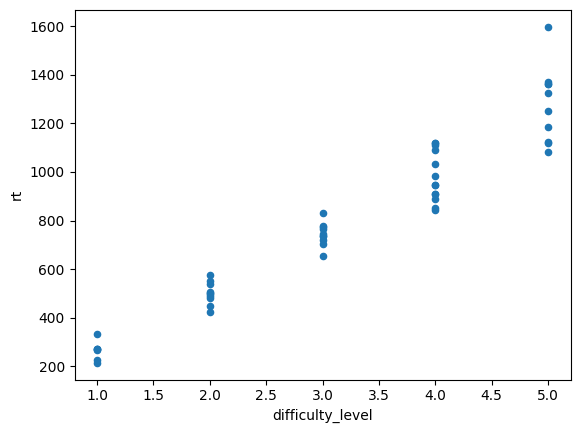

In [26]:
# Select the data for subject 0, and plot the reaction time as a function of the trial difficulty level:
subject_df = trials_df[trials_df["subject"] == "subject_0"]
# plt.figure()
# plt.scatter(subject_df["difficulty_level"], subject_df["rt"])

subject_df.plot(kind="scatter", x="difficulty_level", y="rt")

In [34]:
?pd.read_csv

In [36]:
# Load the subjects dataframe from the csv file at the url:
# https://raw.githubusercontent.com/vigji/python-cimec/main/practicals/data/subjects_df.csv

subject_df = pd.read_csv("https://raw.githubusercontent.com/vigji/python-cimec/main/practicals/data/subjects_df.csv",
                         index_col=0)
subject_df

,sex,handedness,age
subject_0,F,left,37
subject_1,M,right,31
subject_2,F,left,21
subject_3,F,right,29
subject_4,F,left,23
subject_5,M,right,33
subject_6,F,right,35
subject_7,F,left,34
subject_8,F,left,27
subject_9,M,left,33


In [39]:
# Now use boolean indexing on the subject dataframe to include only left-handed males 
# above 30 years in the analysis.
# Plot the reaction time as a function of the trial difficulty level for this subpopulation:
selector = (subject_df["handedness"] == "left") & (subject_df["sex"] == "M") & (subject_df["age"] > 30)

included_subjects = subject_df[selector].index


<Axes: xlabel='difficulty_level', ylabel='rt'>

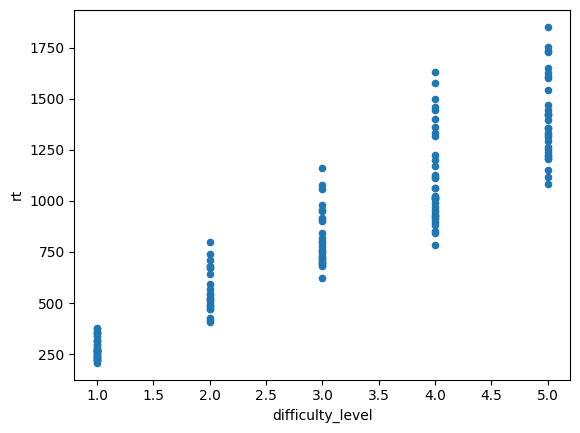

In [44]:
# Select the data for subject 0, and plot the reaction time as a function of the trial difficulty level:
included_subjects_df = trials_df[trials_df["subject"].isin(included_subjects)]

included_subjects_df.plot(kind="scatter", x="difficulty_level", y="rt")